In [1]:
import numpy as np 

In [2]:
data = np.loadtxt('wine.data', delimiter=',')

In [3]:
x = data[:,1:]

In [4]:
y = data[:,:1].flatten()

In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)

In [6]:
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
# 12Ai

loo = LeaveOneOut()

loo_pred = cross_val_predict(clf, x, y, cv=loo)

accuracy = accuracy_score(y, loo_pred)
("Accuracy:", accuracy)

('Accuracy:', 0.7696629213483146)

In [8]:
# 12Aii
confusion_mat = confusion_matrix(y, loo_pred)
("Confusion Matrix:",confusion_mat)

('Confusion Matrix:',
 array([[52,  3,  4],
        [ 5, 54, 12],
        [ 3, 14, 31]]))

In [9]:
# 12 B
from sklearn.model_selection import KFold

In [10]:
k_spread = np.linspace(2, 100, num=20, dtype=int)

In [11]:
accuracy = []

for i in range(len(k_spread)):
    kf = KFold(n_splits=k_spread[i])
    kf.get_n_splits(x)
    kf_pred = cross_val_predict(clf, x, y, cv=kf)
    accuracy.append(accuracy_score(y, kf_pred))
    print(k_spread[i], accuracy_score(y, kf_pred))

2 0.33146067415730335
7 0.651685393258427
12 0.7078651685393258
17 0.7247191011235955
22 0.7471910112359551
27 0.7359550561797753
32 0.7584269662921348
38 0.7584269662921348
43 0.7584269662921348
48 0.7584269662921348
53 0.7584269662921348
58 0.7584269662921348
63 0.7696629213483146
69 0.7696629213483146
74 0.7696629213483146
79 0.7696629213483146
84 0.7696629213483146
89 0.7696629213483146
94 0.7696629213483146
100 0.7696629213483146


In [12]:
accuracy

[0.33146067415730335,
 0.651685393258427,
 0.7078651685393258,
 0.7247191011235955,
 0.7471910112359551,
 0.7359550561797753,
 0.7584269662921348,
 0.7584269662921348,
 0.7584269662921348,
 0.7584269662921348,
 0.7584269662921348,
 0.7584269662921348,
 0.7696629213483146,
 0.7696629213483146,
 0.7696629213483146,
 0.7696629213483146,
 0.7696629213483146,
 0.7696629213483146,
 0.7696629213483146,
 0.7696629213483146]

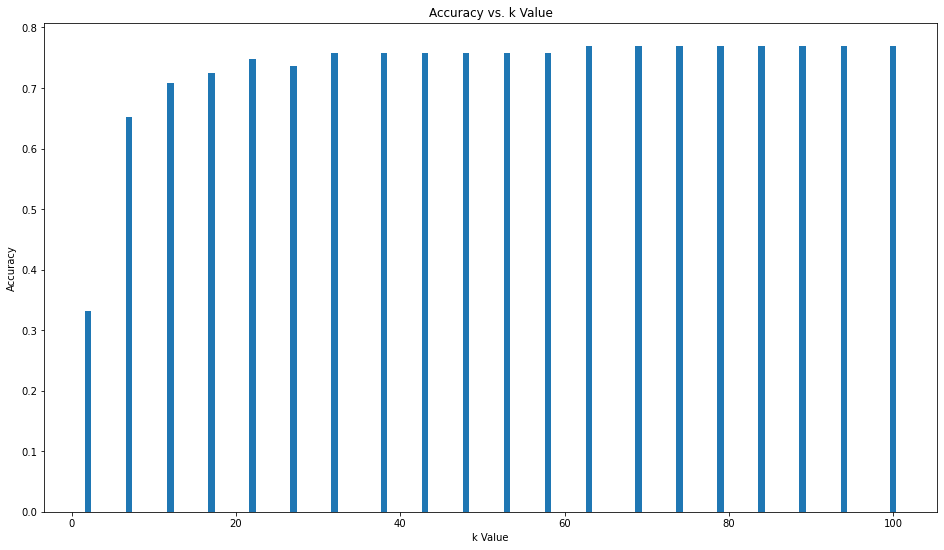

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16, 9))
plt.bar(k_spread, accuracy,)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value')
plt.show()